In [1]:
# Installations
!pip install xgboost
!pip install catboost

# Imports
import pandas as pd
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

from sklearn.metrics import accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.5 MB/s eta 0:00:00




---


# Files Uploading / Loading
The files were either uploaded from the PC's memory or from Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Upload excel file
files.upload()

Saving BankersExtractedData.xlsx to BankersExtractedData (1).xlsx


{'BankersExtractedData.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00W\x00\x8dU\x07AMb\x81\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8e=\x0b\x021\x10D\xff\xcaq\xbd\xb7A\xc1Bb@\xd0R\xb0\xb2\x0f{\x1b/\x90dC\xb2B~\xbe9\xc1\x8fn\x1eo\x18F\xdf\ng*\xe2\xa9\x0e-\x86T\x8f\xe3"\x92\x0f\x00\x15\x17\x8a\xb6N]\xa7n\x1c\x97h\xa5cy\x00;\xe7\x91\xce\x8c\xcfHI`\xab\xd4\x1e\xa8\t\xa5\x99\xe6M\xfe\x0e\x8eF\x9fr\x0e\x1e\xadxN\xe6\xea\xb1pe\'\xc3\xa5!\x05\r\xffrm\xde\xa9\xd45\xef&\xf5\x96\x1f\xd6\xf0;i^PK\x03\x04\x14\x00\x00\x00\x08\x00W\x00\x8dUe\xcf\x8eb\xee\x00\x00\x00+\x02\x00\x00\x11\x00\x00\x00docProps/core.xml\xcd\x92\xcfJ\xc40\x10\x87_Ero\'m\xd5C\xe8\xe6\xa2xR\x10\\P\xbc\x85dv7\xd8\xfc!\x19i\xf7\xedM\xebn\x17\xd1\x07\x10r\xc9\xcc/\xdf|\x03\xe9u\x14:$|N!b"\x8b\xf9jr\x83\xcfB\xc7\r;\x10E\x01\x90\xf5\x01\x9d\xcauI\xf8\xd2\xdc\x85\xe4\x14\x95k\xdaCT\xfaC\xed\x11Z\xceo\xc1!)\xa3H\xc1\x0c\xac\xe2Jd\xb27Z\xe8\x84\x8aB:\xe1\x8d^\xf1\xf13\r\x0b\xcch\xc0\x01\x1dz\xca\xd0\xd4\r09O\x8c\xc7i\x

In [6]:
df = pd.read_excel("BankersExtractedData.xlsx")

In [ ]:
# Excel file from drive
df = pd.read_excel("/content/drive/MyDrive/Final Project Assets/BankersExtractedData.xlsx")

In [7]:
df

,Unnamed: 0,ID,Filename,Neutral,Negative,Positive,Avg_Sentence_Duration,Avg_Word_Duration,Avg_Sentence_Length,Amp_Env_Avg,...,Mel_Spec_Max,Mel_Spec_Min,Mel_Spec_STD,Mel_Spec_Median,MFCC_Avg,MFCC_Max,MFCC_Min,MFCC_STD,MFCC_Median,Label
0,0,0,4640c702d4b3414d,0.405699,0.144997,0.449304,1845.000000,216.833333,8.166667,0.232228,...,0.000000e+00,-80.0,20.202543,-74.073631,-11.845010,247.824310,-515.080383,93.832314,-5.679678,1.0
1,1,1,4640c702d4b3414d,0.499524,0.218824,0.281653,2160.000000,522.750000,4.375000,0.162277,...,0.000000e+00,-80.0,20.179743,-76.002022,-19.615170,269.715027,-553.145325,102.348938,-9.692158,0.0
2,2,2,3f31af7f7dd24f48,0.426327,0.130589,0.443085,2532.857143,250.428571,9.285714,0.213533,...,-9.536743e-07,-80.0,21.505651,-70.402420,-16.306370,271.638245,-523.852112,96.688957,-10.521614,1.0
3,3,3,3f31af7f7dd24f48,0.525413,0.214045,0.260542,2175.000000,388.875000,5.625000,0.169967,...,0.000000e+00,-80.0,21.974392,-69.214996,-15.221334,273.893555,-520.208557,102.185715,-9.260939,0.0
4,4,4,be2d6d342666451c,0.374496,0.084001,0.541503,2917.500000,223.000000,12.250000,0.287463,...,0.000000e+00,-80.0,21.835417,-75.282799,-11.822542,272.060211,-583.335449,100.191246,-4.784217,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,2887,2887,ecb17f35e85b4761,0.576343,0.191187,0.232470,2452.500000,352.250000,6.000000,0.200388,...,-9.536743e-07,-80.0,19.049839,-78.530327,-17.303823,249.487762,-494.444183,99.740761,-7.728402,0.0
2888,2888,2888,a83afcd7b3184051,0.540908,0.131437,0.327655,1436.666667,188.777778,5.888889,0.158180,...,-9.536743e-07,-80.0,19.317268,-78.316879,-20.166182,248.972183,-503.168610,97.050003,-8.899389,1.0
2889,2889,2889,a83afcd7b3184051,0.591126,0.069834,0.339040,1650.000000,207.666667,5.666667,0.221095,...,9.536743e-07,-80.0,21.795860,-75.779480,-19.768429,250.988876,-553.793457,95.586151,-9.708899,0.0
2890,2890,2890,30fa4bafacd24a47,0.356944,0.150828,0.492228,2977.500000,221.250000,12.500000,0.308312,...,0.000000e+00,-80.0,22.209646,-76.026062,-18.139217,257.266479,-527.053772,93.210899,-13.166693,1.0


In [ ]:
y_df = df.iloc[:,-1].values
x_df = df.drop(['Unnamed: 0','ID',"Filename", "Label"], axis=1, inplace=False)

In [ ]:
#normelize the data using std
stdsc = StandardScaler()
x_std = stdsc.fit_transform(x_df)

In [ ]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_std, y_df, test_size = 0.20)
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(x_test.shape))
print('X_test:  '  + str(y_train.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (2313, 31)
Y_train: (579, 31)
X_test:  (2313,)
Y_test:  (579,)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


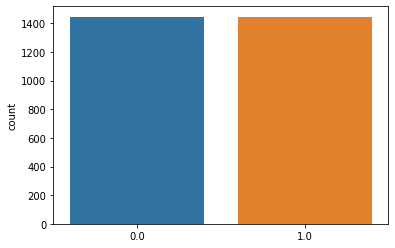

In [ ]:
# Validating that the ballance remained. 50% agents and 50% callers.
countplit = sns.countplot(y_df)

---
# Learning Algorithms
In the first part, we decided to test which models might have the highest scores. After several models and testing the greatest scores calculated by:

* Random Forest Classifier.
* Cat Boost Classifier.
* XGBoost Classifier.

In [ ]:
# First learning test
kfold = KFold(n_splits=5)
Means=[]
accuracy=[]
std=[]
classifiers = ['Random Forest Classifier', 'Cat Boost Classifier','XGBClassifier']

models=[RandomForestClassifier(n_estimators=100), CatBoostClassifier(iterations=20, learning_rate=1, depth=2), XGBClassifier(objective='binary:logistic',nthread=4,seed=42)]

for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    Means.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe=pd.DataFrame({'CV Mean':Means,'Std':std},index=classifiers)  
models_dataframe 

0:	learn: 0.4519685	total: 49.6ms	remaining: 942ms
1:	learn: 0.4360918	total: 59.6ms	remaining: 537ms
2:	learn: 0.4213747	total: 65.2ms	remaining: 370ms
3:	learn: 0.4000530	total: 70.5ms	remaining: 282ms
4:	learn: 0.3779063	total: 75.4ms	remaining: 226ms
5:	learn: 0.3650279	total: 80.3ms	remaining: 187ms
6:	learn: 0.3342605	total: 85.2ms	remaining: 158ms
7:	learn: 0.3271432	total: 90ms	remaining: 135ms
8:	learn: 0.3176600	total: 94.7ms	remaining: 116ms
9:	learn: 0.3076055	total: 99.8ms	remaining: 99.8ms
10:	learn: 0.3017467	total: 110ms	remaining: 90.1ms
11:	learn: 0.2924644	total: 113ms	remaining: 75.5ms
12:	learn: 0.2841280	total: 118ms	remaining: 63.6ms
13:	learn: 0.2800306	total: 125ms	remaining: 53.5ms
14:	learn: 0.2734181	total: 132ms	remaining: 43.9ms
15:	learn: 0.2670093	total: 135ms	remaining: 33.9ms
16:	learn: 0.2618090	total: 139ms	remaining: 24.6ms
17:	learn: 0.2534589	total: 144ms	remaining: 16ms
18:	learn: 0.2462250	total: 148ms	remaining: 7.79ms
19:	learn: 0.2438625	tota

,CV Mean,Std
Random Forest Classifier,0.863369,0.020606
Cat Boost Classifier,0.865960,0.026128
XGBClassifier,0.878071,0.014206


---
## First Step
After consultation with our tutor , Eyal, we decided to focus those models with the greatest scores and to have deeper learning with them.

In [ ]:
XGB_parameters = {'gamma': [0.00001,0.0001,0.001,0.01,0.05,0.1,0.2,0.5,1,1.5,2,2.5,3,3.5,5,10],
              'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2,0.25,0.3,0.35,0.4, 0.5,0.55,0.6,0.75],
              'max_depth': [2,3,4,5,6,7,8,9,10,11,12],
              'n_estimators': [4,6,8,9,10,15,20,35,50,65,80,100]
             }

XGB=XGBClassifier(n_jobs=-1)
grid_XGB = GridSearchCV(estimator=XGB, param_grid=XGB_parameters, n_jobs=-1, cv=2, scoring='roc_auc')
grid_XGB.fit(x_train,y_train)


print(" \nResults from Grid Searc, XGboost:" )
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)

for regressin/catboost model:
train accuracy:   85.90575010808473   test accuracy:   84.4559585492228
Train matrix:
               precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1151
         1.0       0.87      0.85      0.86      1162

    accuracy                           0.86      2313
   macro avg       0.86      0.86      0.86      2313
weighted avg       0.86      0.86      0.86      2313


Test matrix:
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       295
         1.0       0.87      0.80      0.84       284

    accuracy                           0.84       579
   macro avg       0.85      0.84      0.84       579
weighted avg       0.85      0.84      0.84       579



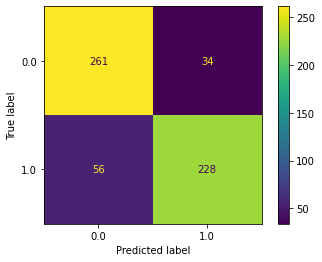

In [ ]:
#XGBoost Classifier prediction and report
# The args are the best params from several tests

XGB = XGBClassifier(n_jobs=-1,gamma=1.5, learning_rate=0.5 , max_depth=2,n_estimators=8).fit(x_train,y_train)

y_train_hat_XGB=XGB.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_hat_XGB)*100

y_test_hat_XGB=XGB.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_hat_XGB)*100

print("for XGBoost model:\ntrain accuracy:  ", train_accuracy, "  test accuracy:  ", test_accuracy)

print("Train matrix:\n" , classification_report(y_train,y_train_hat_XGB))
print()
print("Test matrix:\n" ,classification_report(y_test,y_test_hat_XGB))

confusion_matrix = metrics.confusion_matrix(y_test,y_test_hat_XGB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0.0, 1.0])

cm_display.plot()
plt.show()

In [ ]:
# CatBoost Classifier:

Cat_parameters = {'depth'         : [2,3,4,5,6,7,8,9,10],
                 'learning_rate' : [0.0001,0.001,0.01,0.1,1,1.2,1.5,2,2.5],
                  'iterations'    : [4,6,8,10,20,30,40,50,60,70,80,90, 100]}

CBC = CatBoostClassifier()
Grid_CBC_reg = GridSearchCV(estimator=CBC, param_grid = Cat_parameters, cv = 2, n_jobs=-1)
Grid_CBC_reg.fit(x_train,y_train)


print(" \nResults from Grid Searc, CAT BOOST:" )
print("\n The best score across ALL searched params:\n",Grid_CBC_reg.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC_reg.best_params_)

0:	learn: 0.6866825	total: 51.7ms	remaining: 4.09s
1:	learn: 0.6792449	total: 84.3ms	remaining: 3.29s
2:	learn: 0.6717720	total: 117ms	remaining: 3.01s
3:	learn: 0.6648222	total: 150ms	remaining: 2.85s
4:	learn: 0.6584057	total: 186ms	remaining: 2.79s
5:	learn: 0.6510823	total: 225ms	remaining: 2.78s
6:	learn: 0.6448435	total: 268ms	remaining: 2.8s
7:	learn: 0.6386701	total: 299ms	remaining: 2.69s
8:	learn: 0.6324094	total: 328ms	remaining: 2.59s
9:	learn: 0.6272238	total: 361ms	remaining: 2.53s
10:	learn: 0.6204549	total: 382ms	remaining: 2.4s
11:	learn: 0.6147325	total: 407ms	remaining: 2.31s
12:	learn: 0.6084661	total: 447ms	remaining: 2.31s
13:	learn: 0.6029216	total: 493ms	remaining: 2.32s
14:	learn: 0.5975365	total: 522ms	remaining: 2.26s
15:	learn: 0.5918545	total: 540ms	remaining: 2.16s
16:	learn: 0.5868522	total: 560ms	remaining: 2.08s
17:	learn: 0.5820111	total: 577ms	remaining: 1.99s
18:	learn: 0.5769656	total: 634ms	remaining: 2.03s
19:	learn: 0.5724946	total: 661ms	remaini

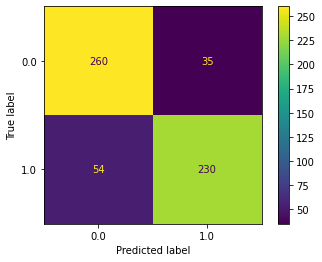

In [ ]:
# CatBoost Classifier prediction and report
# The args are the best params from several tests.

CBC = CatBoostClassifier(depth=7, iterations=80 , learning_rate=0.01).fit(x_train,y_train)

y_train_hat_cat=CBC.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_hat_cat)*100

y_test_hat_cat=CBC.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_hat_cat)*100

print("for catboost model:\ntrain accuracy:  ", train_accuracy, "  test accuracy:  ", test_accuracy)

print("Train matrix:\n" , classification_report(y_train,y_train_hat_cat))
print()
print("Test matrix:\n" ,classification_report(y_test,y_test_hat_cat))

confusion_matrix = metrics.confusion_matrix(y_test,y_test_hat_cat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0.0, 1.0])

cm_display.plot()
plt.show()

In [ ]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators':[10,50,100,200,350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,4,8,10,16,30,50,100],
    'criterion': ['gini', 'entropy']
}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

rfc_grid.fit(x_train, y_train)

# print(f"Logistic Regression Best Params:\n{rfc_grid.best_params_}")

y_pred = rfc_grid.predict(x_test)
print("Score: ",rfc_grid.score(x_test, y_test),"\n")
print("Accuracy: ", accuracy_score(y_test,y_pred))

Logistic Regression Best Params:
{'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 350}
Score:  0.8566493955094991 

Accuracy:  0.8566493955094991


Accuracy:  0.8687392055267703
Train matrix:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1151
         1.0       1.00      1.00      1.00      1162

    accuracy                           1.00      2313
   macro avg       1.00      1.00      1.00      2313
weighted avg       1.00      1.00      1.00      2313
 

Test matrix:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       295
         1.0       0.88      0.85      0.86       284

    accuracy                           0.87       579
   macro avg       0.87      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579
 



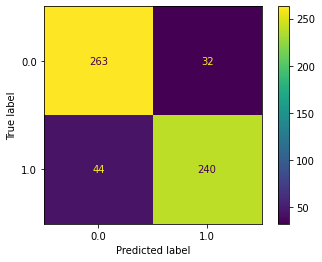

In [ ]:
# Random Forest Classifier prediction and report
rfc = RandomForestClassifier(criterion='gini',max_features='auto',max_depth=16,n_estimators=350,random_state=42)

rfc.fit(x_train, y_train)
rfc_train = rfc.predict(x_train)
rfc_test = rfc.predict(x_test)

print("Accuracy: ", accuracy_score(y_test,rfc_test))

print("Train matrix:\n" , classification_report(y_train,rfc_train),"\n")
print("Test matrix:\n" ,classification_report(y_test,rfc_test),"\n")

confusion_matrix = metrics.confusion_matrix(y_test,rfc_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0.0, 1.0])
cm_display.plot()
plt.show()

--- 
## Second Step
We decided to try more models and decided to try neural network models. After many tests, we decided to focus on these two models as well:

* MLPClassifier.
* Keras Neural Network.

In [ ]:
clf_params = {'solver': ['lbfgs'],
              'max_iter': [2,4,8,10,20,50,100,200],
              'alpha': 10.0 ** -np.arange(1, 10),
              'hidden_layer_sizes':np.arange(10, 15),
              'random_state':[0,1,2,3,4,5,6,7,8,9]}

clf = GridSearchCV(MLPClassifier(), clf_params, n_jobs=-1)

clf.fit(x_train, y_train)

clf_prediction = clf.predict(x_test)

print("Score: ",clf.score(x_test, y_test),"\n")
print("Best Params: ", clf.best_params_, "\n")
print("Accuracy: ", accuracy_score(y_test,clf_prediction))

Score:  0.8929188255613126 

Best Params:  {'alpha': 0.001, 'hidden_layer_sizes': 11, 'max_iter': 20, 'random_state': 4, 'solver': 'lbfgs'} 

Accuracy:  0.8929188255613126


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy:  0.9067357512953368
Train matrix:
               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      1151
         1.0       0.92      0.90      0.91      1162

    accuracy                           0.91      2313
   macro avg       0.91      0.91      0.91      2313
weighted avg       0.91      0.91      0.91      2313
 

Test matrix:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       295
         1.0       0.93      0.88      0.90       284

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579
 



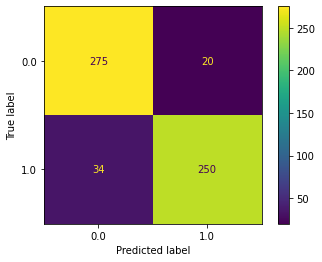

In [ ]:
# MLPClassifier Neural Network Report:
clf = MLPClassifier(alpha=0.001, hidden_layer_sizes=(11,),solver='lbfgs', random_state=4, max_iter=20)
clf.fit(x_train, y_train)

clf_prediction_train = clf.predict(x_train)
clf_prediction_test = clf.predict(x_test)

# print("Score: ",clf.score(x_test, y_test),"\n")
# print("Best Params: ", clf.best_params_, "\n")
print("Accuracy: ", accuracy_score(y_test,clf_prediction_test))

print("Train matrix:\n" , classification_report(y_train,clf_prediction_train),"\n")
print("Test matrix:\n" ,classification_report(y_test,clf_prediction_test),"\n")

confusion_matrix = metrics.confusion_matrix(y_test,clf_prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0.0, 1.0])
cm_display.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(31,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, batch_size=10)

_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
232/232 [==============================] - 3s 4ms/step - loss: 0.5809 - accuracy: 0.7112
Epoch 2/30
232/232 [==============================] - 2s 7ms/step - loss: 0.4274 - accuracy: 0.8214
Epoch 3/30
232/232 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8439
Epoch 4/30
232/232 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8487
Epoch 5/30
232/232 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8573
Epoch 6/30
232/232 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8612
Epoch 7/30
232/232 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8673
Epoch 8/30
232/232 [==============================] - 1s 2ms/step - loss: 0.3112 - accuracy: 0.8725
Epoch 9/30
232/232 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 0.8699
Epoch 10/30
232/232 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8759